In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib as mpl
import os
mpl.rcParams['figure.dpi'] = 500

In [2]:
def plott_settings_default(plot_title, xlabel, ylabel, name_for_saving=0, legend_title=0, subtitle=0):
    plt.title(plot_title)
    plt.xlabel(xlabel, fontsize="12")
    plt.ylabel(ylabel, fontsize="12")
    if subtitle != 0: 
        plt.suptitle(subtitle)
    if legend_title!=0: 
        plt.legend(title=legend_title)
    if name_for_saving !=0: 
        plt.savefig(f'../mythesis_HQO_Reicherd/figs/{name_for_saving}', bbox_inches='tight')
    plt.show()

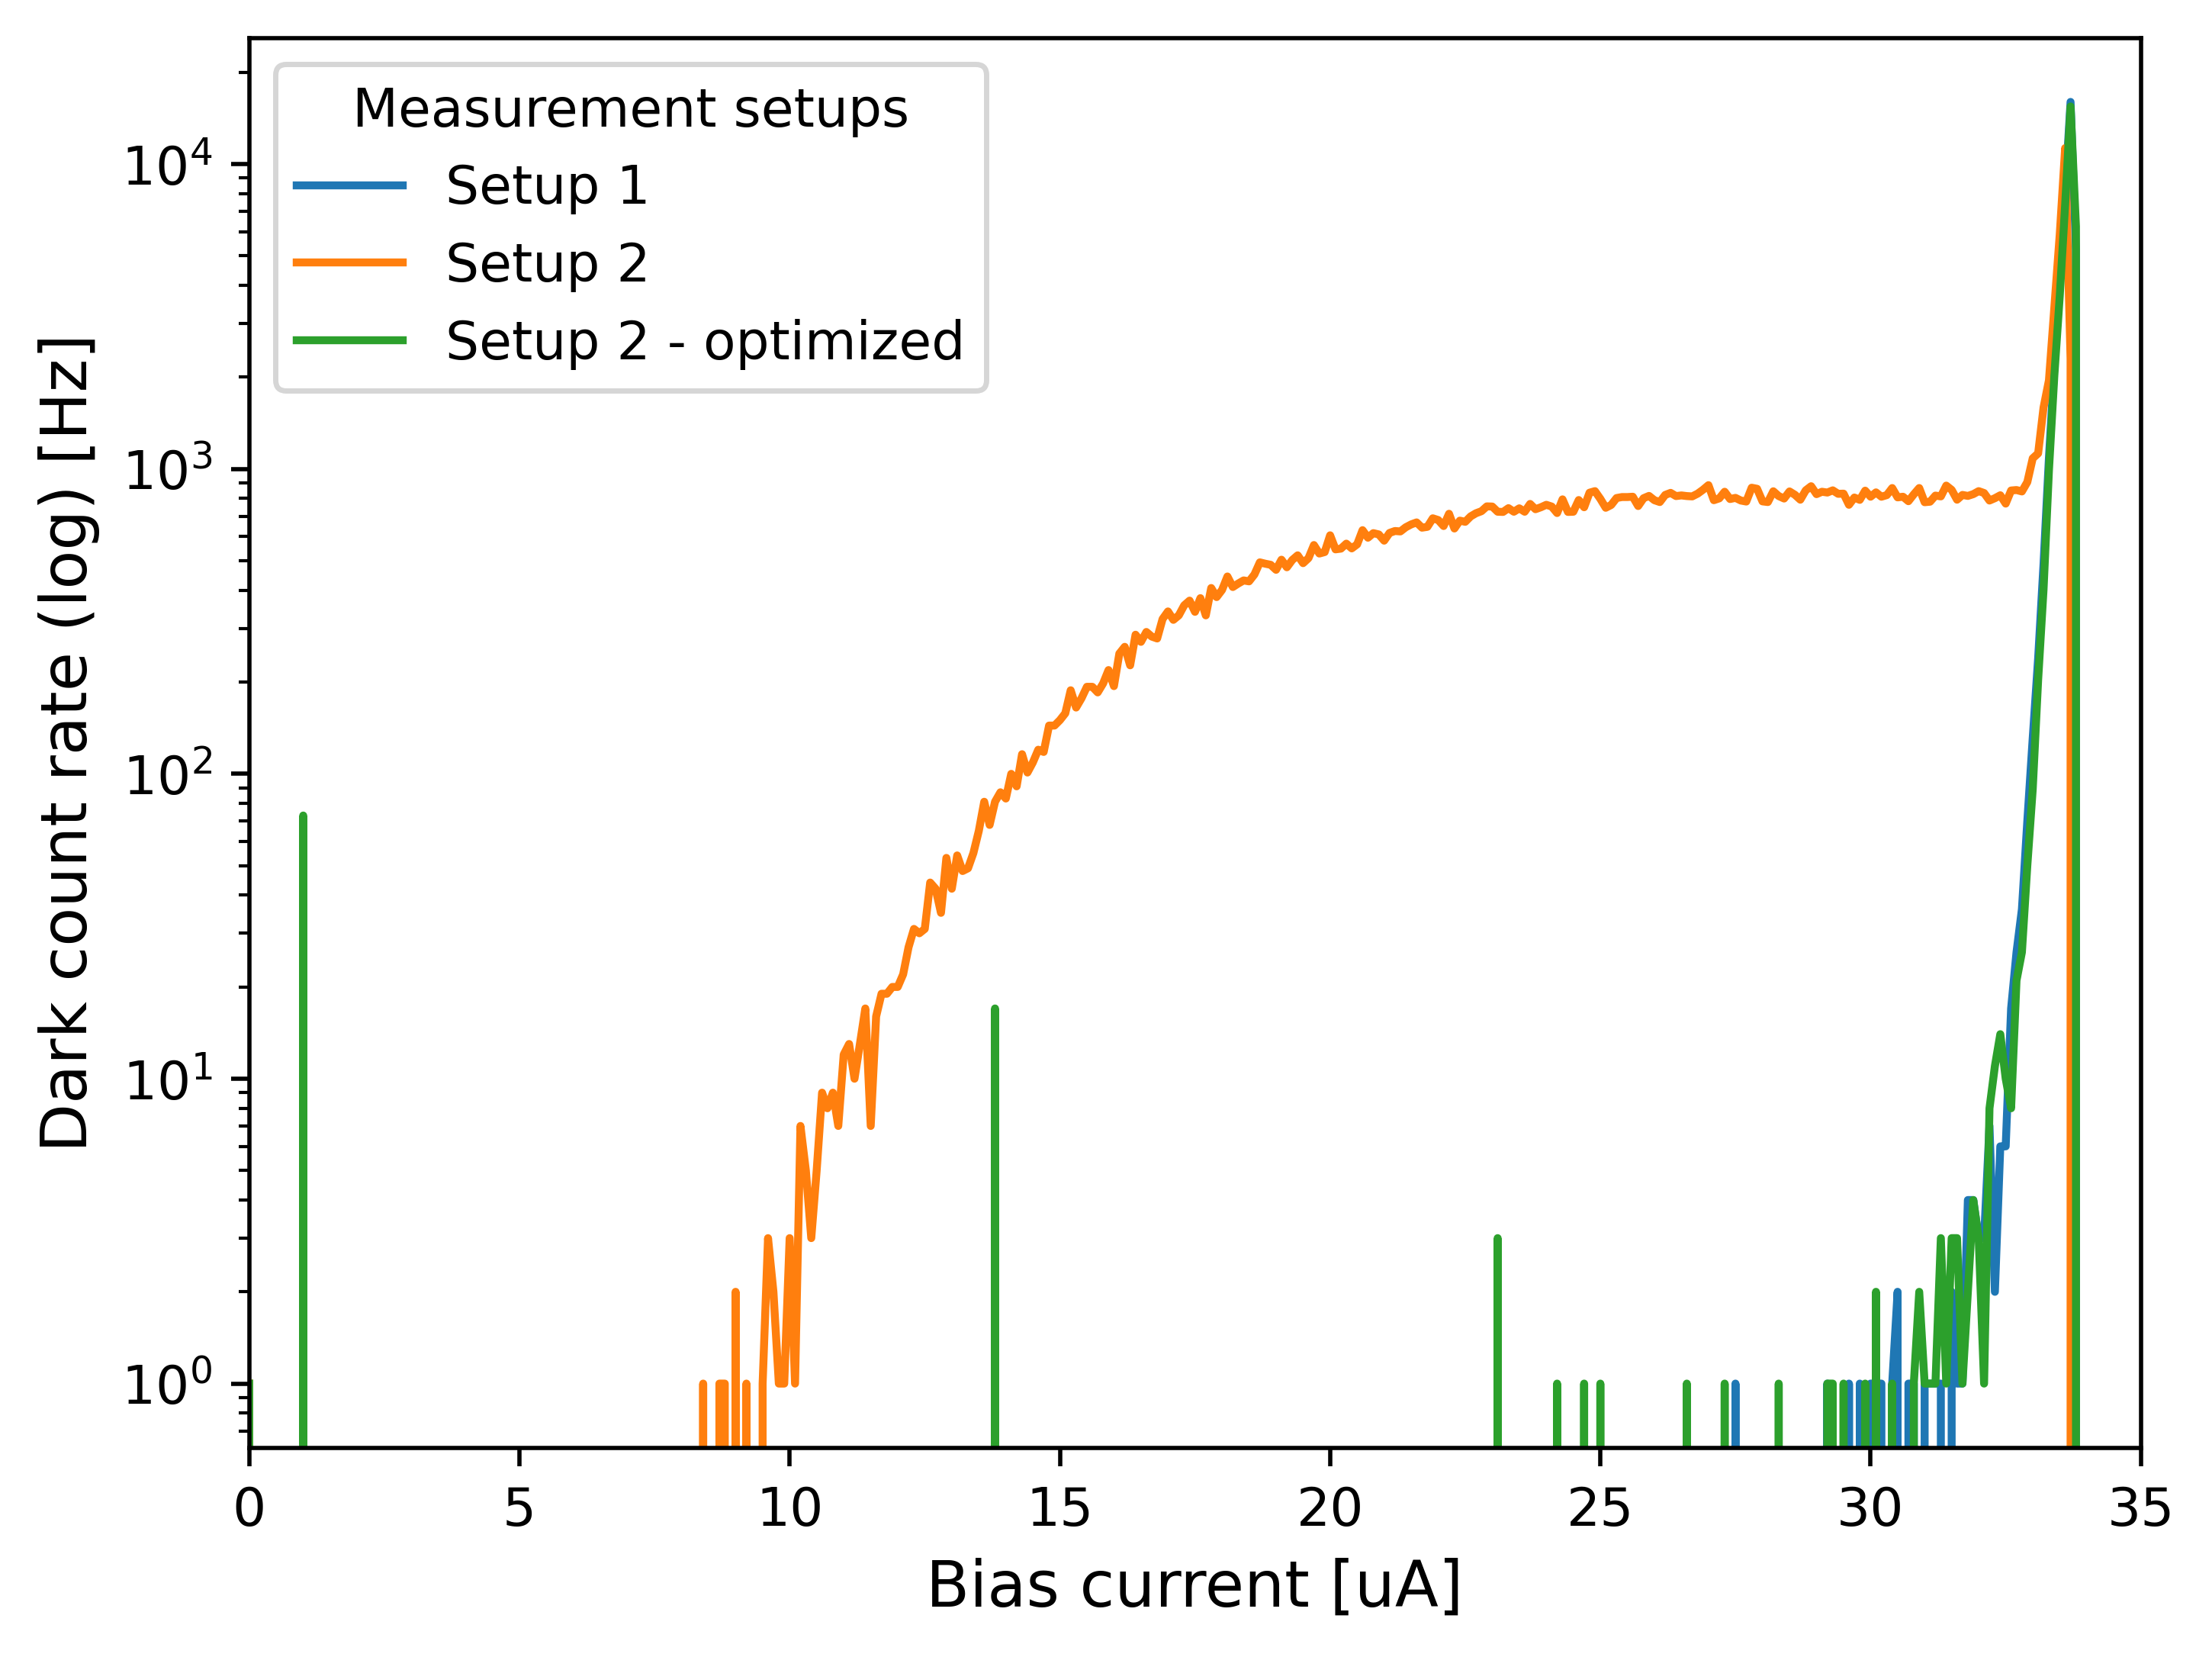

In [4]:
data_on = np.loadtxt('DCR Rate/HQO_04062024_SNSPD_DCR_Cap_on.txt', skiprows=16, usecols=range(9,17))
data_off = np.loadtxt("DCR Rate/HQO_05062024_SNSPD_DCR_Cap_off_ch1.txt", skiprows=16, usecols=range(9,17))
data_coupled_to_exp = np.loadtxt("DCR Rate/HQO_06062024_SNSPD_DCR_coupled_laser_off.txt", skiprows=16, usecols=range(9,17))
data_uncoupled_to_exp = np.loadtxt("DCR Rate/HQO_20240606_DCR_couppled_no_laser.txt", skiprows=16, usecols=range(9,17))
data_coupled_to_bb = np.loadtxt("DCR Rate/HQO_19062024_DCR_BlackBox_fiber_unprotected.txt", skiprows=16, usecols=range(9,17))
data_coupled_to_bb_prot = np.loadtxt("DCR Rate/HQO_19062024_DCR_BlackBox_fiber_Aluprotected.txt", skiprows=16, usecols=range(9,17))
data_coupled_to_bb_prot_2 = np.loadtxt("DCR Rate/HQO__2024-06-20--07-42-56_Counts_vs_Bias.txt", skiprows=16, usecols=range(9,17))
data_coupled_to_bb_prot_3 = np.loadtxt("DCR Rate/HQO_20062024_DCR_BlackBox_fiber_Aluprotected_final.txt", skiprows=16, usecols=range(9,17))

channel = 0

plt.plot(np.linspace(0,40,len(data_on[:,channel])), data_on[:,channel], label="Setup 1")
# plt.plot(np.linspace(0,40,len(data_off[:,channel])), data_off[:,channel], label="DCR - cap off")
plt.plot(np.linspace(0,40,len(data_coupled_to_exp[:,channel])), data_coupled_to_exp[:,channel], label="Setup 2")
# plt.plot(np.linspace(0,40,len(data_uncoupled_to_exp[:,channel])), data_uncoupled_to_exp[:,channel], label="DCR - fibre uncoupled - hanging loose")
# plt.plot(np.linspace(0,40,len(data_coupled_to_bb[:,channel])), data_coupled_to_bb[:,channel], label="DCR - fibre coupled to bb no fiber protection")
# plt.plot(np.linspace(0,40,len(data_coupled_to_bb_prot[:,channel])), data_coupled_to_bb_prot[:,channel], label="DCR - fibre coupled to bb with Alu fiber protection first measurement")
# plt.plot(np.linspace(0,40,len(data_coupled_to_bb_prot_2[:,channel])), data_coupled_to_bb_prot_2[:,channel], label="DCR - fibre coupled to bb with Alu fiber protection sec. measurement")
plt.plot(np.linspace(0,40,len(data_coupled_to_bb_prot_3[:,channel])), data_coupled_to_bb_prot_3[:,channel], label="Setup 2 - optimized")

plt.yscale("log")
plt.xlim(left=0, right=35)

# title = "Dark count rate (DCR) - Channel 1"
ylabel = "Dark count rate (log) [Hz]"
xlabel = "Bias current [uA]"
legend_title="Measurement setups"
savename = "HQO_20240708_DCR_cap_on_Channel_1_Ba_thesis"

plott_settings_default("", xlabel, ylabel, savename, legend_title)

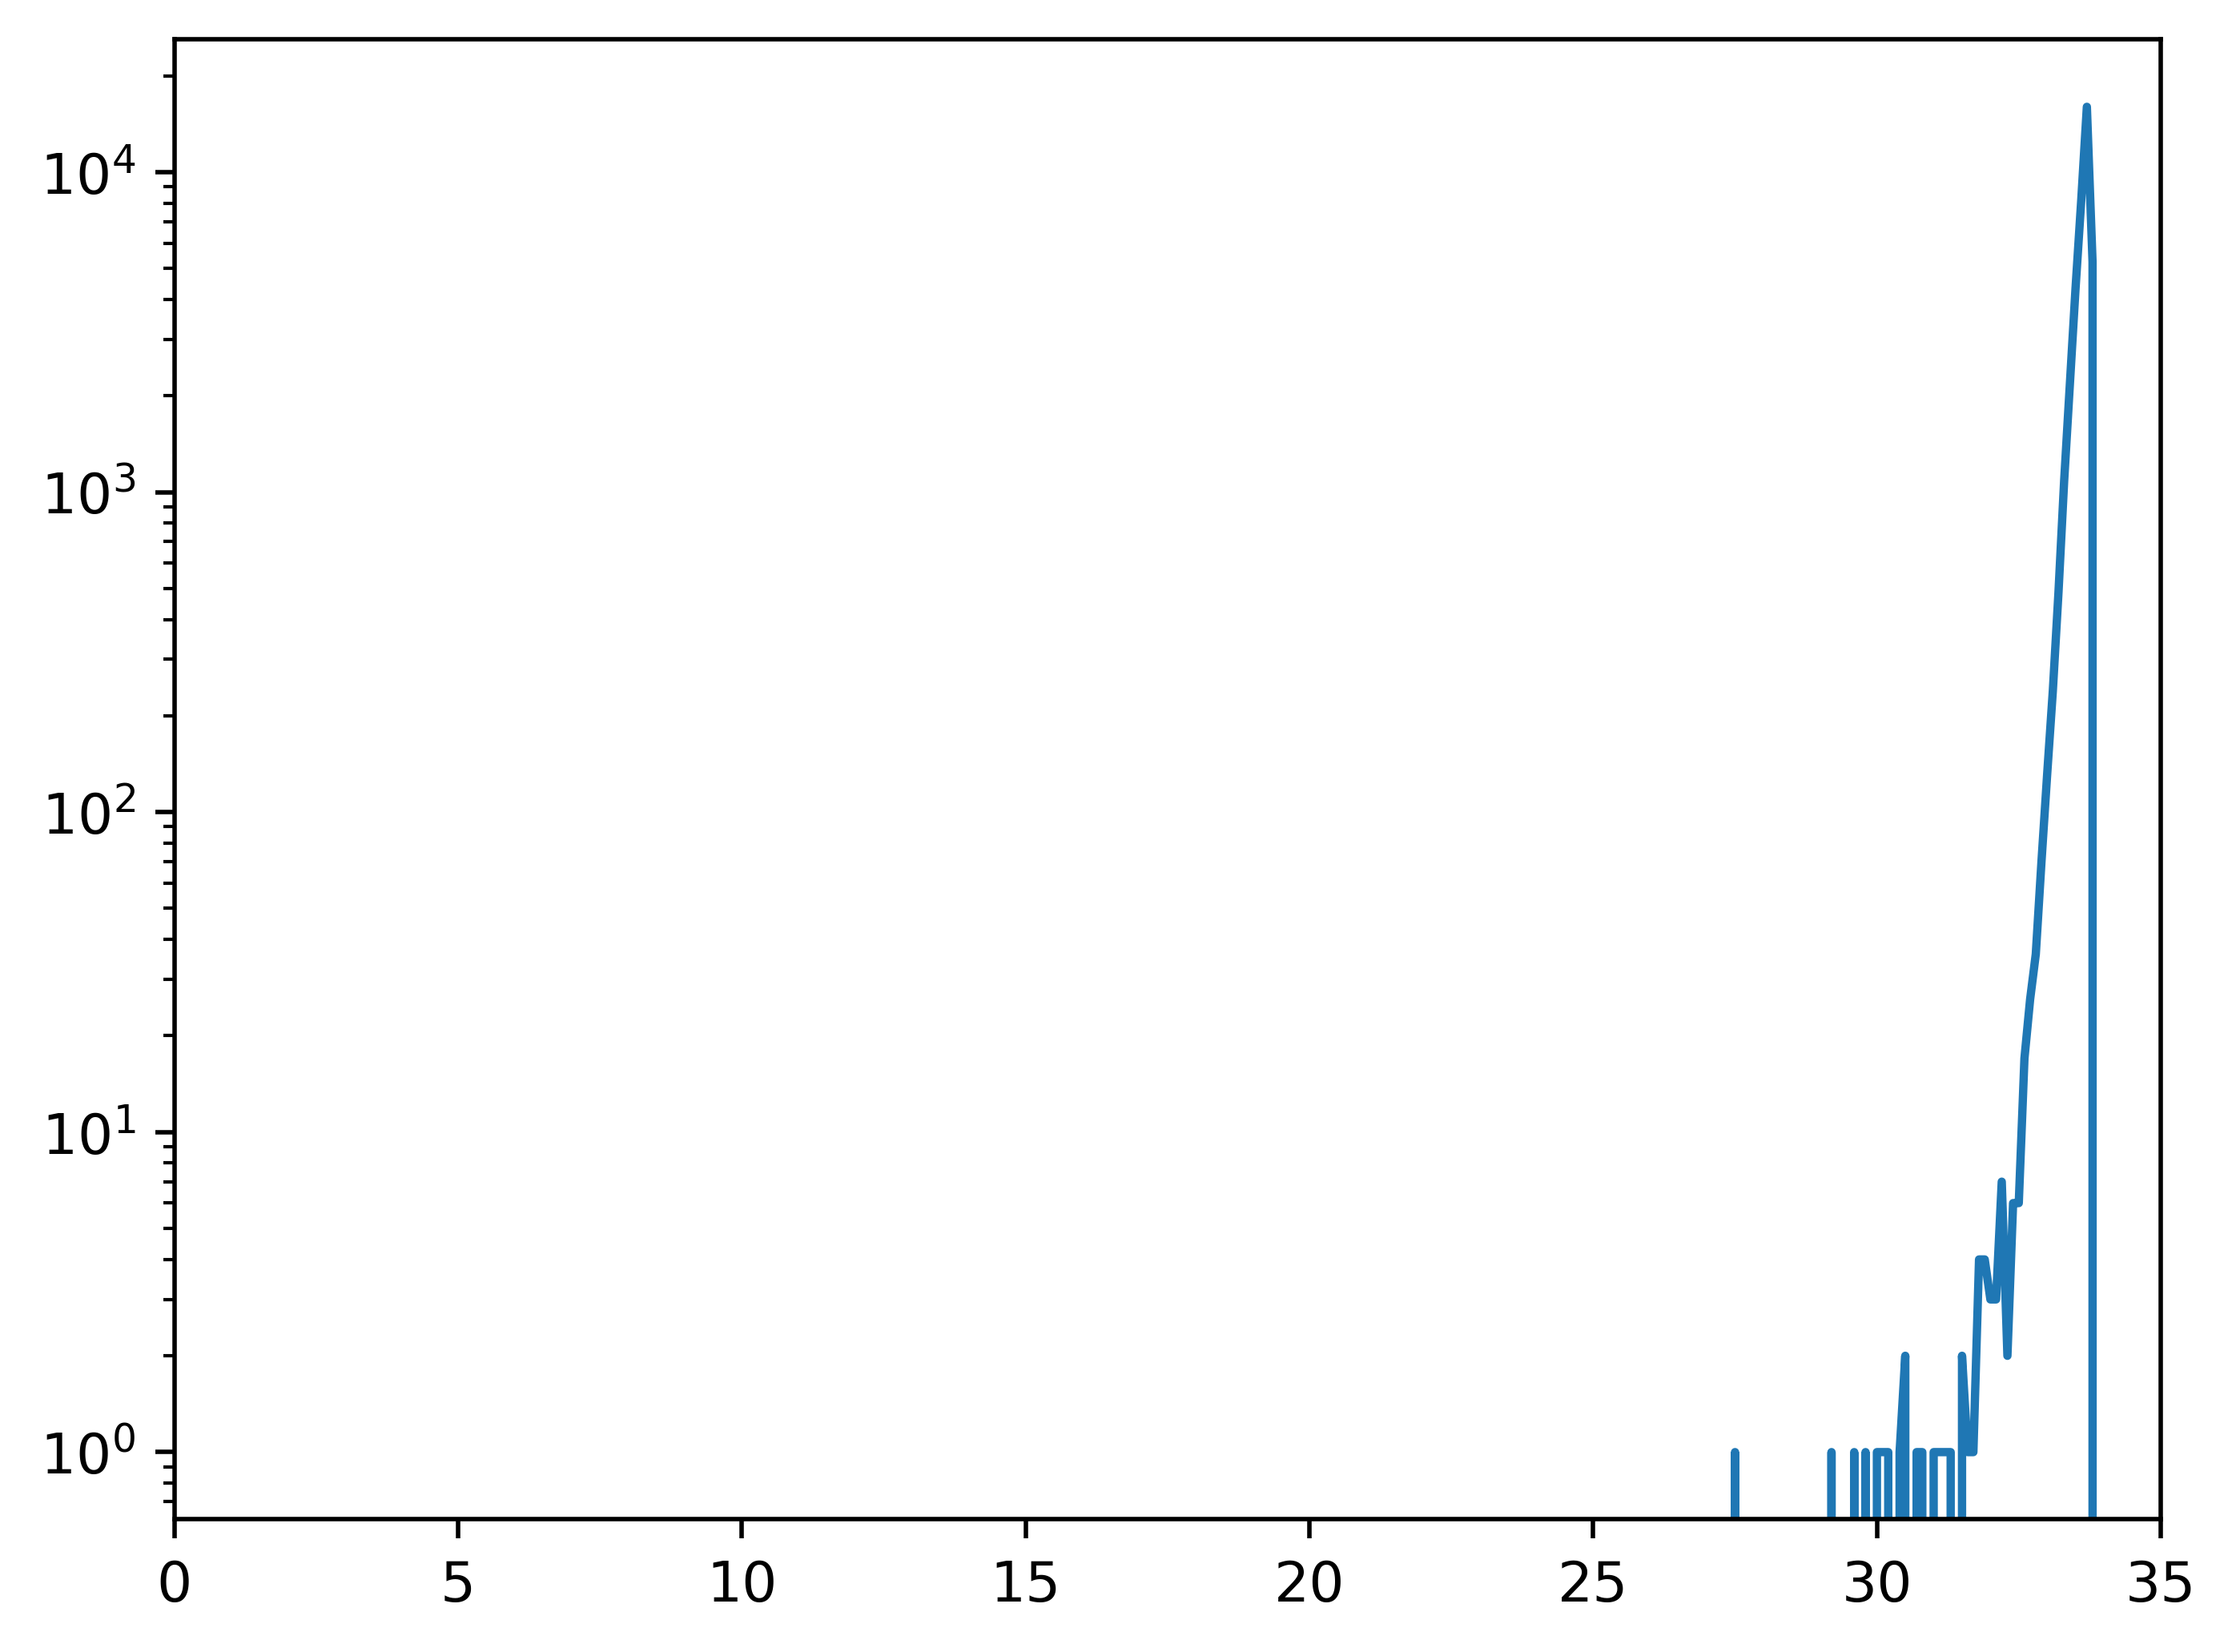

In [41]:
plt.plot(np.linspace(0,40,len(data_on[:,channel])), data_on[:,channel], label="DCR - cap on")
plt.yscale("log")
plt.xlim(left=0, right=35)

savename = "HQO_20240708_DCR_Channel_1_Ba_thesis"

# plott_settings_default("", xlabel, ylabel, name_for_saving=savename, legend_title=legend_title)

In [42]:
# calculating the mean of the DCR values in the folder DCR_230724
dead_time_measurements_all = os.listdir("./DCR Rate/DCR_230724")

def get_list_by_bias(file_list, bias): 
    bias_list = list(filter(lambda k: str(bias) + "uA" in k, file_list))
    return bias_list

In [43]:
dcr_24 = get_list_by_bias(dead_time_measurements_all, 24)
dcr_28 = get_list_by_bias(dead_time_measurements_all, 28)
dcr_31 = get_list_by_bias(dead_time_measurements_all, "31_2")

In [44]:
# calculating the mean of the DCR values
dcr_24_arr_1 = np.loadtxt(f"./DCR Rate/DCR_230724/{dcr_24[0]}", skiprows=1, usecols=[1])
dcr_24_arr_2 = np.loadtxt(f"./DCR Rate/DCR_230724/{dcr_24[1]}", skiprows=1, usecols=[1])
dcr_24_arr_3 = np.loadtxt(f"./DCR Rate/DCR_230724/{dcr_24[2]}", skiprows=1, usecols=[1])
dcr_24_arr_4 = np.loadtxt(f"./DCR Rate/DCR_230724/{dcr_24[3]}", skiprows=1, usecols=[1])
dcr_24_arr_5 = np.loadtxt(f"./DCR Rate/DCR_230724/{dcr_24[4]}", skiprows=1, usecols=[1])

# filter the nan values of arrays 
dcr_24_arr_1 = dcr_24_arr_1[~np.isnan(dcr_24_arr_1)]
dcr_24_arr_2 = dcr_24_arr_2[~np.isnan(dcr_24_arr_2)]
dcr_24_arr_3 = dcr_24_arr_3[~np.isnan(dcr_24_arr_3)]
dcr_24_arr_4 = dcr_24_arr_4[~np.isnan(dcr_24_arr_4)]
dcr_24_arr_5 = dcr_24_arr_5[~np.isnan(dcr_24_arr_5)]

dcr_24_mean = np.mean([dcr_24_arr_1, dcr_24_arr_2, dcr_24_arr_3, dcr_24_arr_4, dcr_24_arr_5], axis=0)
dcr_24_std = np.std([dcr_24_arr_1, dcr_24_arr_2, dcr_24_arr_3, dcr_24_arr_4, dcr_24_arr_5], axis=0)

print(f"Mean DCR 24uA: {dcr_24_mean[0]}")
print(f"STD DCR 24uA: {dcr_24_std[0]}")

Mean DCR 24uA: 1.4
STD DCR 24uA: 1.019803902718557


In [45]:
# Function to load and filter data
def load_and_filter_data(file_path):
    data = np.loadtxt(file_path, skiprows=1, usecols=[1])
    return data[~np.isnan(data)]

# List of file paths
file_paths_24 = [f"./DCR Rate/DCR_230724/{file}" for file in dcr_24]
file_paths_28 = [f"./DCR Rate/DCR_230724/{file}" for file in dcr_28]
file_paths_31 = [f"./DCR Rate/DCR_230724/{file}" for file in dcr_31]

# Load and filter all data arrays
data_arrays_24 = np.array([load_and_filter_data(file_path) for file_path in file_paths_24])
data_arrays_28 = np.array([load_and_filter_data(file_path) for file_path in file_paths_28])
data_arrays_31 = np.array([load_and_filter_data(file_path) for file_path in file_paths_31])

# Calculate mean and std
mean_24 = np.mean(data_arrays_24, axis=0)
std_24 = np.std(data_arrays_24, axis=0)
mean_28 = np.mean(data_arrays_28, axis=0)
std_28 = np.std(data_arrays_28, axis=0)
mean_31 = np.mean(data_arrays_31, axis=0)
std_31 = np.std(data_arrays_31, axis=0)

# Print and round results to 2 points after comma
print(f"Mean DCR 24uA: {round(mean_24[0], 2)}")
print(f"STD DCR 24uA: {round(std_24[0], 2)}")
print(f"Mean DCR 28uA: {round(mean_28[0], 2)}")
print(f"STD DCR 28uA: {round(std_28[0], 2)}")
print(f"Mean DCR 31.2uA: {round(mean_31[0], 2)}")
print(f"STD DCR 31.2uA: {round(std_31[0], 2)}")


Mean DCR 24uA: 1.4
STD DCR 24uA: 1.02
Mean DCR 28uA: 1.2
STD DCR 28uA: 0.98
Mean DCR 31.2uA: 1.4
STD DCR 31.2uA: 1.36
